Simple Linear Regression

In [1]:
# Importing Needed Pakages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Download the data
path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
# Read the data
df=pd.read_csv(path)
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# Let's select some features
cdf=df[['ENGINESIZE','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267


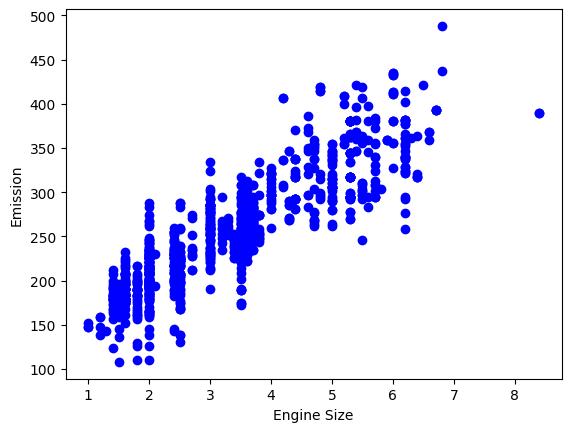

In [5]:
# Simple Linear Regression (One independent variable and adependent variable)
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [6]:
# Split Train/Test Set
# create a mask to select random rows using np.random.rand() function
msk=np.random.rand(len(df)) < 0.8
train=cdf[msk]
test=cdf[~msk]
print(len(train))
print(len(test))

850
217


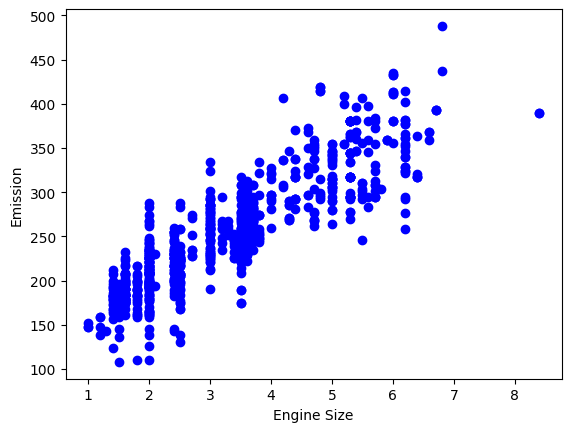

In [7]:
# Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [8]:
# Create a model using training set
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
# The coefficients
print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)


Coefficients: [[38.82380991]]
Intercept: [126.60841273]


Text(0, 0.5, 'Emission')

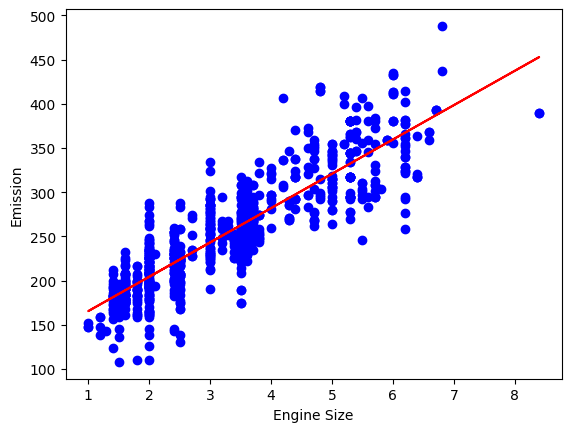

In [9]:
# Plot Outputs
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],'-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

In [10]:
# Evaluation
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_=regr.predict(test_x)
#test_pred=regr.predict([[2.4]])
#print(test_pred)
print("Mean Absolute Error (MAE):%.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares(MSE):%.2f" % np.mean(test_y_-test_y)**2)
print("R2 Score: %.2f" % r2_score(test_y,test_y_))


Mean Absolute Error (MAE):23.76
Residual sum of squares(MSE):2.12
R2 Score: 0.76
